<a href="https://colab.research.google.com/github/AstxMargaryan/Colab_works/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [9]:
df = pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [15]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [18]:
df["month_added"] = df["date_added"].dt.month
df["year_added"] = df["date_added"].dt.year
df["day_added"] = df["date_added"].dt.day

In [21]:
df["type"].value_counts()

,count
type,
Movie,6126
TV Show,2664


In [24]:
director_type_counts = df.groupby(["director","type"]).size().reset_index(name ="count")

In [27]:
director_type_counts.groupby("director")["count"].sum().sort_values(ascending=False).head(10)

,count
director,
Not Given,2588
Rajiv Chilaka,20
"Raúl Campos, Jan Suter",18
Alastair Fothergill,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12


In [29]:
country_type_counts = df.groupby(["country","type"]).size().reset_index(name ="count")

In [30]:
country_type_counts.groupby("country")["count"].sum().sort_values(ascending=False).head(20)

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


In [33]:
df_genres = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

listed_in_type_counts = df_genres.groupby(["listed_in","type"]).size().reset_index(name ="count")

In [36]:
df_genres["listed_in"].value_counts().head(20)

,count
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


In [38]:
df.groupby(['rating','type']).size().reset_index(name='count')

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [50]:
movies_df = df[df["type"]=="Movie"]

In [40]:
df[df["type"]=="TV Show"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9,2021,24
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,2021,24
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",9,2021,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",1,2017,17
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,9,2018,13
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,15
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,6,2018,23


In [41]:
df.groupby(['month_added','type']).size().reset_index(name='count')

,month_added,type,count
0,1,Movie,545
1,1,TV Show,192
2,2,Movie,382
3,2,TV Show,180
4,3,Movie,528
5,3,TV Show,213
6,4,Movie,549
7,4,TV Show,214
8,5,Movie,439
9,5,TV Show,193


In [42]:
df.groupby(['year_added','type']).size().reset_index(name='count')


,year_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [43]:
df.groupby(['day_added','type']).size().reset_index(name='count')


,day_added,type,count
0,1,Movie,1689
1,1,TV Show,520
2,2,Movie,239
3,2,TV Show,86
4,3,Movie,99
...,...,...,...
57,29,TV Show,44
58,30,Movie,119
59,30,TV Show,91
60,31,Movie,186


In [44]:
df['type'].value_counts(normalize=True)*100

,proportion
type,
Movie,69.692833
TV Show,30.307167


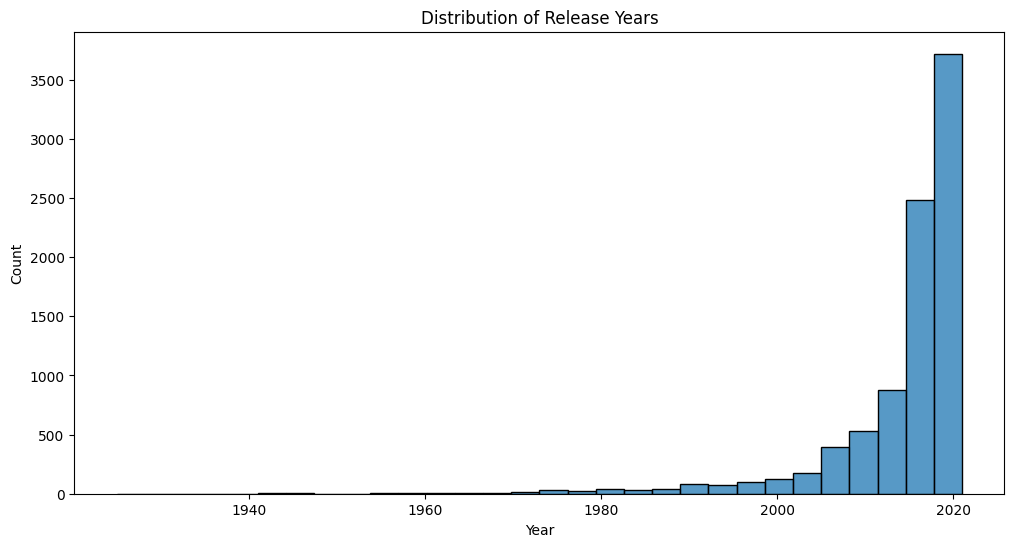

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

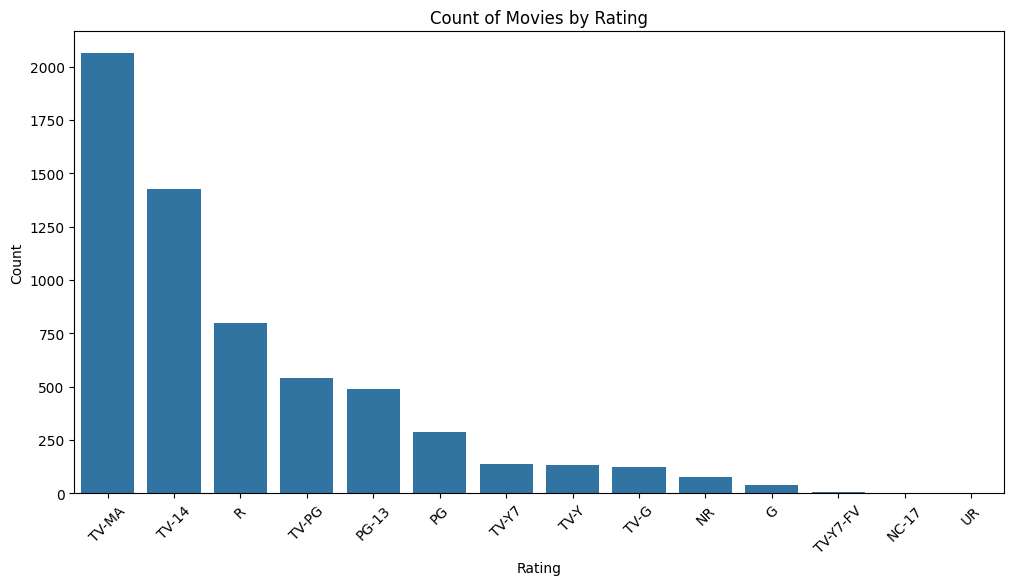

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(data=movies_df, x='rating', order=movies_df['rating'].value_counts().index)
plt.title('Count of Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()